In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
file_path1 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/random_search_summary_metrics.csv"
file_path2 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/optuna_hpo_results_with_metrics.csv"
file_path3 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/trajectory_hpo_results_with_metrics.csv"
file_path4 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/afi_hpo_results_with_metrics.csv"

random_search = pd.read_csv(file_path1)
optuna = pd.read_csv(file_path2)
trajectory = pd.read_csv(file_path3)
afi = pd.read_csv(file_path4)

In [0]:
file_path1 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/random_search_results_with_metrics_with_outliers.csv"
file_path2 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/optuna_hpo_results_with_metrics_with_outliers.csv"
file_path3 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/trajectory_hpo_results_with_metrics_with_outliers.csv"
file_path4 = "/Workspace/Users/n.gavrilov@student.fontys.nl/Claire/afi_hpo_results_with_metrics_with_outliers.csv"

random_search_outliers = pd.read_csv(file_path1)
optuna_outliers = pd.read_csv(file_path2)
trajectory_otliers = pd.read_csv(file_path3)
afi_outliers = pd.read_csv(file_path4)

In [0]:
# Function to preprocess each dataset
def preprocess_hpo_data(df):
    """
    Preprocess HPO dataset by:
    1. Standardizing column names.
    2. Dropping rows with null values.
    3. Ensuring consistent column structure.
    
    Args:
        df (pd.DataFrame): The HPO results DataFrame.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    # Standardize column names: lowercase and strip whitespace
    df.columns = df.columns.str.strip().str.lower()

    # Drop rows with null values
    df = df.dropna()

    # Ensure consistent column structure
    expected_columns = [
        'trainer', 'dataset', 'best_hyperparameters', 'best_rmse', 'mae', 'r2',
        'total_time', 'average_trial_time', 'combined_performance_score'
    ]
    missing_columns = [col for col in expected_columns if col not in df.columns]

    # If any columns are missing, add them with default values (e.g., NaN)
    for col in missing_columns:
        df[col] = None

    # Retain only the expected columns in the defined order
    df = df[expected_columns]

    return df

# Preprocess each dataset
random_search = preprocess_hpo_data(random_search)
trajectory = preprocess_hpo_data(trajectory)
optuna = preprocess_hpo_data(optuna)
afi = preprocess_hpo_data(afi)

# Display the first few rows of each preprocessed DataFrame to confirm consistency
print("Random Search Preprocessed Data:")
print(random_search.head())

print("\nTrajectory HPO Preprocessed Data:")
print(trajectory.head())

print("\nOptuna HPO Preprocessed Data:")
print(optuna.head())

print("\nAFI HPO Preprocessed Data:")
print(afi.head())



Random Search Preprocessed Data:
                  trainer  ... combined_performance_score
0  TrainerAverageLastYear  ...                  -0.021403
1  TrainerAverageLastYear  ...                   0.181496
2  TrainerAverageLastYear  ...                  -0.324713
3  TrainerAverageLastYear  ...                  -0.031840
4  TrainerAverageLastYear  ...                  -0.319680

[5 rows x 9 columns]

Trajectory HPO Preprocessed Data:
                  trainer  ... combined_performance_score
0  TrainerAverageLastYear  ...                  -0.021403
1  TrainerAverageLastYear  ...                   0.181496
2  TrainerAverageLastYear  ...                  -0.330405
3  TrainerAverageLastYear  ...                  -0.031840
4  TrainerAverageLastYear  ...                  -0.319680

[5 rows x 9 columns]

Optuna HPO Preprocessed Data:
                  trainer  ... combined_performance_score
0  TrainerAverageLastYear  ...                   0.683779
1  TrainerAverageLastYear  ...               

/root/.ipykernel/1837/command-6154121983180854-3586689136:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = None


In [0]:


# Preprocess each dataset
random_search_outliers = preprocess_hpo_data(random_search_outliers)
trajectory_outliers = preprocess_hpo_data(trajectory_otliers)
optuna_outliers = preprocess_hpo_data(optuna_outliers)
afi_outliers = preprocess_hpo_data(afi_outliers)

# Display the first few rows of each preprocessed DataFrame to confirm consistency
print("Random Search Preprocessed Data:")
print(random_search_outliers.head())

print("\nTrajectory HPO Preprocessed Data:")
print(trajectory_outliers.head())

print("\nOptuna HPO Preprocessed Data:")
print(optuna_outliers.head())

print("\nAFI HPO Preprocessed Data:")
print(afi_outliers.head())

Random Search Preprocessed Data:
                  trainer  ... combined_performance_score
0  TrainerAverageLastYear  ...                   0.380379
1  TrainerAverageLastYear  ...                   0.900277
2  TrainerAverageLastYear  ...                   1.708189
3  TrainerAverageLastYear  ...                   1.041918
4  TrainerAverageLastYear  ...                   1.237138

[5 rows x 9 columns]

Trajectory HPO Preprocessed Data:
                  trainer  ... combined_performance_score
0  TrainerAverageLastYear  ...                   0.065075
1  TrainerAverageLastYear  ...                  -0.009312
2  TrainerAverageLastYear  ...                  -0.032909
3  TrainerAverageLastYear  ...                  -0.143900
4  TrainerAverageLastYear  ...                  -0.041781

[5 rows x 9 columns]

Optuna HPO Preprocessed Data:
                  trainer  ... combined_performance_score
0  TrainerAverageLastYear  ...                   0.415197
1  TrainerAverageLastYear  ...               

In [0]:
# Function to create summary datasets
def create_summary_dataset(df, method_name):
    """
    Create a summary dataset with mean metrics for each trainer.

    Args:
        df (pd.DataFrame): The HPO results DataFrame.
        method_name (str): The name of the HPO method.

    Returns:
        pd.DataFrame: Summary DataFrame.
    """
    mean_stats = df.groupby('trainer').mean().add_suffix('_mean')
    std_stats = df.groupby('trainer').std().add_suffix('_std')
    summary = mean_stats.merge(std_stats, left_index=True, right_index=True).reset_index()
    summary['method'] = method_name
    return summary

# Create summary datasets for each HPO method
random_search_summary = create_summary_dataset(random_search, 'Random Search')
trajectory_summary = create_summary_dataset(trajectory, 'Trajectory HPO')
optuna_summary = create_summary_dataset(optuna, 'Optuna HPO')
afi_summary = create_summary_dataset(afi, 'AFI HPO')

# Display the first few rows of each summary dataset
print("Random Search Summary:")
print(random_search_summary.head())

print("\nTrajectory HPO Summary:")
print(trajectory_summary.head())

print("\nOptuna HPO Summary:")
print(optuna_summary.head())

print("\nAFI HPO Summary:")
print(afi_summary.head())

Random Search Summary:
                      trainer  ...         method
0      TrainerAverageLastYear  ...  Random Search
1         TrainerDecisionTree  ...  Random Search
2  TrainerKNeighborsRegressor  ...  Random Search
3     TrainerMajoritySelector  ...  Random Search
4        TrainerMovingAverage  ...  Random Search

[5 rows x 12 columns]

Trajectory HPO Summary:
                      trainer  ...          method
0      TrainerAverageLastYear  ...  Trajectory HPO
1         TrainerDecisionTree  ...  Trajectory HPO
2  TrainerKNeighborsRegressor  ...  Trajectory HPO
3     TrainerMajoritySelector  ...  Trajectory HPO
4       TrainerValueLastYears  ...  Trajectory HPO

[5 rows x 14 columns]

Optuna HPO Summary:
                      trainer  ...      method
0      TrainerAverageLastYear  ...  Optuna HPO
1         TrainerDecisionTree  ...  Optuna HPO
2  TrainerKNeighborsRegressor  ...  Optuna HPO
3     TrainerMajoritySelector  ...  Optuna HPO
4       TrainerValueLastYears  ...  Optuna H

/root/.ipykernel/1837/command-6154121983180875-2371130055:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_stats = df.groupby('trainer').mean().add_suffix('_mean')
/root/.ipykernel/1837/command-6154121983180875-2371130055:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_stats = df.groupby('trainer').std().add_suffix('_std')
/root/.ipykernel/1837/command-6154121983180875-2371130055:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be val

In [0]:
# Create summary datasets for each HPO method
random_search_outliers_summary = create_summary_dataset(random_search_outliers, 'Random Search')
trajectory_outliers_summary = create_summary_dataset(trajectory_outliers, 'Trajectory HPO')
optuna_outliers_summary = create_summary_dataset(optuna_outliers, 'Optuna HPO')
afi_outliers_summary = create_summary_dataset(afi_outliers, 'AFI HPO')

# Display the first few rows of each summary dataset
print("Random Search Summary:")
print(random_search_summary.head())

print("\nTrajectory HPO Summary:")
print(trajectory_summary.head())

print("\nOptuna HPO Summary:")
print(optuna_summary.head())

print("\nAFI HPO Summary:")
print(afi_summary.head())

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File <command-7484323730515227>, line 2
      1 # Create summary datasets for each HPO method
----> 2 random_search_outliers_summary = create_summary_dataset(random_search_outliers, 'Random Search')
      3 trajectory_outliers_summary = create_summary_dataset(trajectory_outliers, 'Trajectory HPO')
      4 optuna_outliers_summary = create_summary_dataset(optuna_outliers, 'Optuna HPO')

File <command-6154121983180875>, line 13, in create_summary_dataset(df, method_name)
      2 def create_summary_dataset(df, method_name):
      3     """
      4     Create a summary dataset with mean metrics for each trainer.
      5 
   (...)
     11         pd.DataFrame: Summary DataFrame.
     12     """
---> 13     mean_stats = df.groupby('trainer').mean().add_suffix('_mean')
     14     std_stats = df.groupby('trainer').std().add_suffix('_std')
     

In [0]:
# Combine summary datasets into one DataFrame for visualizations
summary_combined_outliers = pd.concat([random_search_outliers_summary, trajectory_outliers_summary, optuna_outliers_summary, afi_outliers_summary], ignore_index=True)

# Combine all datasets for scatter plot visualization
all_data_combined = pd.concat([
    random_search_outliers.assign(method="Random Search"),
    trajectory_outliers.assign(method="Trajectory HPO"),
    optuna_outliers.assign(method="Optuna HPO"),
    afi_outliers.assign(method="AFI HPO")
], ignore_index=True)


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:431)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:458)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:537)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:508)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:613)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:636)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:48)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:271)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(Attr

In [0]:
# Combine summary datasets into one DataFrame for visualizations
summary_combined = pd.concat([random_search_summary, trajectory_summary, optuna_summary, afi_summary], ignore_index=True)

# Combine all datasets for scatter plot visualization
all_data_combined_outliers = pd.concat([
    random_search.assign(method="Random Search"),
    trajectory.assign(method="Trajectory HPO"),
    optuna.assign(method="Optuna HPO"),
    afi.assign(method="AFI HPO")
], ignore_index=True)

In [0]:
# Check the columns in the summary_combined DataFrame to identify the issue
summary_combined.columns
summary_combined.to_csv('summary_combined.csv')

In [0]:
# Create the summary DataFrame with selected metrics
analysis_summary = summary_combined[['method', 'best_rmse_mean', 'mae_mean', 'total_time_mean']].copy()

# Rename columns for clarity
analysis_summary.rename(columns={
    'method': 'Model Name',
    'best_rmse_mean': 'Mean RMSE',
    'mae_mean': 'Mean MAE',
    'total_time_mean': 'Mean Total Time'
}, inplace=True)

# Display the resulting DataFrame
print(analysis_summary)


        Model Name   Mean RMSE    Mean MAE  Mean Total Time
0    Random Search  594.757152  437.364092         1.250168
1    Random Search  634.726862  483.084650         0.485284
2    Random Search  593.392186  463.062553         0.382468
3    Random Search  719.827717  514.449955         0.024168
4    Random Search  645.039818  440.643362         1.717342
5    Random Search  265.121512  169.393987         0.142455
6    Random Search  601.792468  454.097355        18.985063
7   Trajectory HPO  594.757152  437.364092         1.741010
8   Trajectory HPO  627.917400  469.932267         0.742089
9   Trajectory HPO  610.882329  468.224903         0.686357
10  Trajectory HPO  704.885705  500.338964         0.049923
11  Trajectory HPO  265.121512  169.393987         0.253967
12  Trajectory HPO  581.523976  441.115500        24.155668
13      Optuna HPO  838.224882  630.439751         1.123465
14      Optuna HPO  775.293699  591.816243         0.043283
15      Optuna HPO  789.786274  590.1669

In [0]:
# Create a summary DataFrame with both mean and standard deviation
analysis_summary = summary_combined[['method', 
                                     'best_rmse_mean', 'best_rmse_std', 
                                     'mae_mean', 'mae_std', 
                                     'total_time_mean', 'total_time_std']].copy()

# Format columns to display "mean ± std"
analysis_summary['Mean RMSE'] = analysis_summary['best_rmse_mean'].round(2).astype(str) + " ± " + analysis_summary['best_rmse_std'].round(2).astype(str)
analysis_summary['Mean MAE'] = analysis_summary['mae_mean'].round(2).astype(str) + " ± " + analysis_summary['mae_std'].round(2).astype(str)
analysis_summary['Mean Total Time'] = analysis_summary['total_time_mean'].round(2).astype(str) + " ± " + analysis_summary['total_time_std'].round(2).astype(str)

# Select and rename columns
analysis_summary = analysis_summary[['method', 'Mean RMSE', 'Mean MAE', 'Mean Total Time']].rename(columns={
    'method': 'Model Name'
})

# Display the resulting DataFrame
print(analysis_summary)


        Model Name        Mean RMSE         Mean MAE Mean Total Time
0    Random Search  594.76 ± 424.89  437.36 ± 348.06     1.25 ± 1.03
1    Random Search  634.73 ± 489.65  483.08 ± 418.75     0.49 ± 0.04
2    Random Search  593.39 ± 455.15  463.06 ± 400.34     0.38 ± 0.01
3    Random Search  719.83 ± 606.57  514.45 ± 505.73      0.02 ± 0.0
4    Random Search  645.04 ± 580.85  440.64 ± 407.58     1.72 ± 1.07
5    Random Search  265.12 ± 148.97  169.39 ± 136.47     0.14 ± 0.03
6    Random Search  601.79 ± 424.38    454.1 ± 362.3    18.99 ± 9.47
7   Trajectory HPO   599.27 ± 417.7  441.88 ± 341.78     1.96 ± 3.41
8   Trajectory HPO  655.71 ± 491.77   492.3 ± 418.24     0.56 ± 0.04
9   Trajectory HPO  621.01 ± 452.04   477.5 ± 393.43     0.48 ± 0.03
10  Trajectory HPO  725.11 ± 594.93   520.26 ± 496.4      0.04 ± 0.0
11  Trajectory HPO  320.35 ± 231.36  216.74 ± 203.52     1.26 ± 3.57
12  Trajectory HPO  601.92 ± 413.76  448.76 ± 348.81   25.16 ± 26.53
13      Optuna HPO   598.4 ± 416.7

In [0]:
# Aggregate the metrics for each method (group by method)
analysis_summary = summary_combined.groupby('method').agg(
    best_rmse_mean=('best_rmse_mean', 'mean'),
    best_rmse_std=('best_rmse_std', 'mean'),
    mae_mean=('mae_mean', 'mean'),
    mae_std=('mae_std', 'mean'),
    r2_mean=('r2_mean', 'mean'),
    r2_std=('r2_std', 'mean'),
    total_time_mean=('total_time_mean', 'mean'),
    total_time_std=('total_time_std', 'mean')
).reset_index()

# Format columns to display "mean ± std"
analysis_summary['Mean RMSE'] = analysis_summary['best_rmse_mean'].round(2).astype(str) + " ± " + analysis_summary['best_rmse_std'].round(2).astype(str)
analysis_summary['Mean MAE'] = analysis_summary['mae_mean'].round(2).astype(str) + " ± " + analysis_summary['mae_std'].round(2).astype(str)
analysis_summary['Mean R2'] = analysis_summary['r2_mean'].round(2).astype(str) + " ± " + analysis_summary['r2_std'].round(2).astype(str)
analysis_summary['Mean Total Time'] = analysis_summary['total_time_mean'].round(2).astype(str) + " ± " + analysis_summary['total_time_std'].round(2).astype(str)

# Select and rename columns
analysis_summary = analysis_summary[['method', 'Mean RMSE', 'Mean MAE', 'Mean R2', 'Mean Total Time']].rename(columns={
    'method': 'Model Name'
})
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the resulting DataFrame
analysis_summary.head()



,Model Name,Mean RMSE,Mean MAE,Mean R2,Mean Total Time
0,AFI HPO,777.77 ± 625.95,582.15 ± 517.24,-1.14 ± 1.82,1.1 ± 1.41
1,Optuna HPO,582.12 ± 431.62,432.88 ± 368.09,-0.59 ± 2.43,4.99 ± 5.59
2,Random Search,579.24 ± 447.21,423.16 ± 368.46,-0.52 ± 2.43,3.28 ± 1.67
3,Trajectory HPO,587.23 ± 433.59,432.9 ± 367.03,-0.58 ± 2.29,4.91 ± 5.6


In [0]:
# Aggregate the metrics for each method (group by method)
analysis_summary = summary_combined_outliers.groupby('method').agg(
    best_rmse_mean=('best_rmse_mean', 'mean'),
    best_rmse_std=('best_rmse_std', 'mean'),
    mae_mean=('mae_mean', 'mean'),
    mae_std=('mae_std', 'mean'),
    r2_mean=('r2_mean', 'mean'),
    r2_std=('r2_std', 'mean'),
    total_time_mean=('total_time_mean', 'mean'),
    total_time_std=('total_time_std', 'mean')
).reset_index()

# Format columns to display "mean ± std"
analysis_summary['Mean RMSE'] = analysis_summary['best_rmse_mean'].round(2).astype(str) + " ± " + analysis_summary['best_rmse_std'].round(2).astype(str)
analysis_summary['Mean MAE'] = analysis_summary['mae_mean'].round(2).astype(str) + " ± " + analysis_summary['mae_std'].round(2).astype(str)
analysis_summary['Mean R2'] = analysis_summary['r2_mean'].round(2).astype(str) + " ± " + analysis_summary['r2_std'].round(2).astype(str)
analysis_summary['Mean Total Time'] = analysis_summary['total_time_mean'].round(2).astype(str) + " ± " + analysis_summary['total_time_std'].round(2).astype(str)

# Select and rename columns
analysis_summary = analysis_summary[['method', 'Mean RMSE', 'Mean MAE', 'Mean R2', 'Mean Total Time']].rename(columns={
    'method': 'Model Name'
})
# Set pandas to display all rows
pd.set_option('display.max_rows', None)

# Display the resulting DataFrame
analysis_summary.head()

,Model Name,Mean RMSE,Mean MAE,Mean R2,Mean Total Time
0,AFI HPO,5964.74 ± 9016.76,4326.57 ± 7955.56,-21.76 ± 88.83,1.12 ± 1.27
1,Optuna HPO,4941.53 ± 7576.24,3455.08 ± 5742.34,-15.88 ± 69.22,5.47 ± 5.82
2,Random Search,4703.31 ± 7212.52,3274.86 ± 5400.67,-13.73 ± 59.7,4.9 ± 5.25
3,Trajectory HPO,4967.69 ± 7583.49,3467.05 ± 5783.39,-16.74 ± 73.51,5.31 ± 5.58


/root/.ipykernel/11445/command-6154121983180881-4151298293:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='method', y=metric, data=data, ci=None)


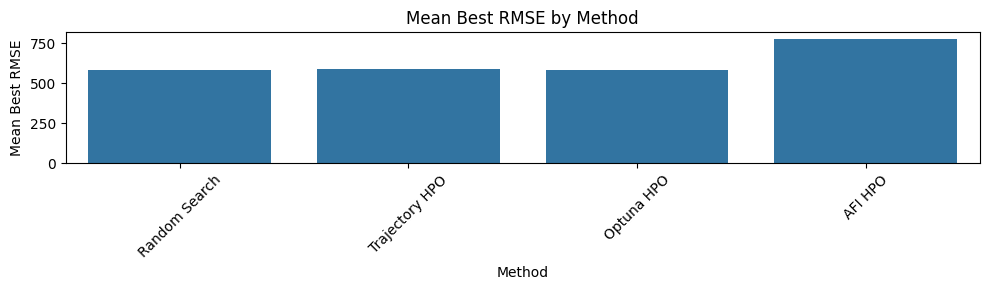

/root/.ipykernel/11445/command-6154121983180881-4151298293:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='method', y=metric, data=data, ci=None)


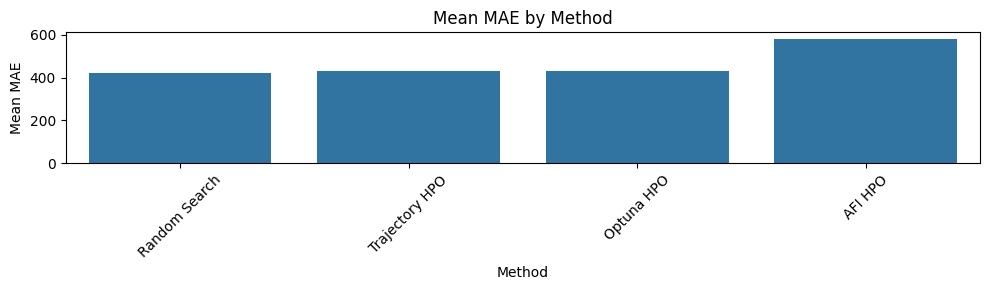

/root/.ipykernel/11445/command-6154121983180881-4151298293:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='method', y=metric, data=data, ci=None)


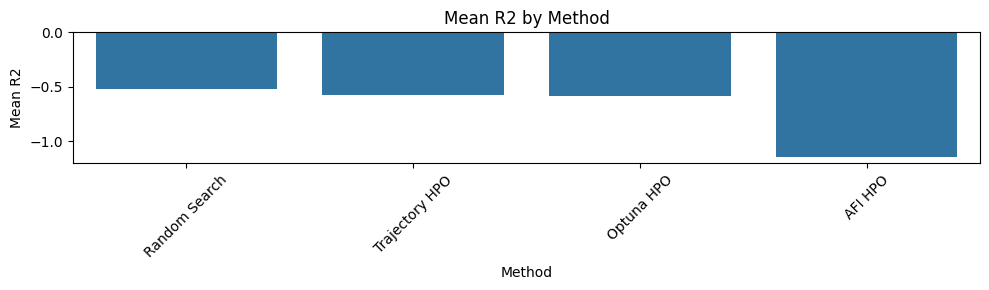

/root/.ipykernel/11445/command-6154121983180881-4151298293:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='method', y=metric, data=data, ci=None)


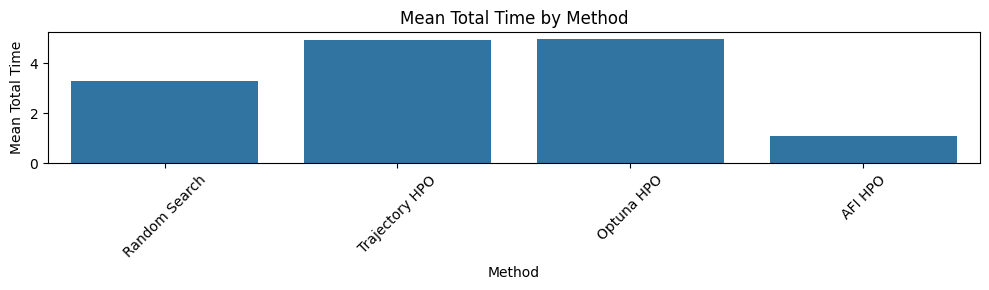

In [0]:
# Function to plot bar charts
def plot_bar(data, metric, title, xlabel, ylabel):
    """
    Plot bar chart for a specific metric.

    Args:
        data (pd.DataFrame): Summary dataset.
        metric (str): Metric to plot.
        title (str): Chart title.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
    """
    plt.figure(figsize=(10, 3))
    sns.barplot(x='method', y=metric, data=data, ci=None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualizations
plot_bar(summary_combined, 'best_rmse_mean', 'Mean Best RMSE by Method', 'Method', 'Mean Best RMSE')
plot_bar(summary_combined, 'mae_mean', 'Mean MAE by Method', 'Method', 'Mean MAE')
plot_bar(summary_combined, 'r2_mean', 'Mean R2 by Method', 'Method', 'Mean R2')
plot_bar(summary_combined, 'total_time_mean', 'Mean Total Time by Method', 'Method', 'Mean Total Time')


In [0]:
import numpy as np
import pandas as pd

def bootstrap_test(data, metric, baseline_method, alternative_method, n_resamples=10000):
    """
    Perform bootstrapping to test the hypothesis that an alternative method performs better than the baseline.

    Args:
        data (pd.DataFrame): Dataset containing performance metrics.
        metric (str): Column name of the metric to compare.
        baseline_method (str): Name of the baseline method (e.g., 'Random Search').
        alternative_method (str): Name of the alternative method to test against the baseline.
        n_resamples (int): Number of bootstrap resamples.

    Returns:
        float: P-value for the test.
    """
    # Filter data for the baseline and alternative methods
    baseline_data = data[data["method"] == baseline_method][metric]
    alternative_data = data[data["method"] == alternative_method][metric]

    # Bootstrapping
    baseline_resamples = np.random.choice(baseline_data, size=(n_resamples, len(baseline_data)), replace=True)
    alternative_resamples = np.random.choice(alternative_data, size=(n_resamples, len(alternative_data)), replace=True)

    # Calculate mean differences
    mean_differences = alternative_resamples.mean(axis=1) - baseline_resamples.mean(axis=1)

    # Calculate p-value
    p_value = (mean_differences <= 0).sum() / n_resamples
    return p_value

# Example usage
# Assume `summary_combined` is a DataFrame containing the metrics and methods
metrics = ['best_rmse_mean', 'mae_mean', 'r2_mean']
baseline = 'Random Search'
methods_to_test = ['Trajectory HPO', 'Optuna HPO', 'AFI HPO']

# Perform the test for each metric and method
results = []
for metric in metrics:
    for method in methods_to_test:
        p_value = bootstrap_test(summary_combined, metric, baseline, method)
        results.append({'Metric': metric, 'Method': method, 'P-Value': p_value})

# Convert results to a DataFrame
statistical_results = pd.DataFrame(results)

# Display results
print(statistical_results)


           Metric          Method  P-Value
0  best_rmse_mean  Trajectory HPO   0.4550
1  best_rmse_mean      Optuna HPO   0.4946
2  best_rmse_mean         AFI HPO   0.0001
3        mae_mean  Trajectory HPO   0.4278
4        mae_mean      Optuna HPO   0.4192
5        mae_mean         AFI HPO   0.0019
6         r2_mean  Trajectory HPO   0.5696
7         r2_mean      Optuna HPO   0.5641
8         r2_mean         AFI HPO   0.9499
